In [87]:
from ROOT import TH2F, TCanvas, TGraph, TMath, TH1F
import array as ar

# Create a 2D histogram (3x3 bins)
hist2D = TH2F("hist2D", "Simple 2D Histogram;Tpi;Range", 3, 0, 3, 3, 0, 3)

# Fill the 2D histogram with simple content
# Fill it in a way that each bin has unique content for clarity
contents = [[1, 2, 3], 
            [4, 5, 6], 
            [7, 8, 9]]

for y in range(1, 4):  # Range over y-bins
    for x in range(1, 4):  # Range over x-bins
        hist2D.SetBinContent(x, y, contents[y-1][x-1])

Warning in <TROOT::Append>: Replacing existing TH1: hist2D (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


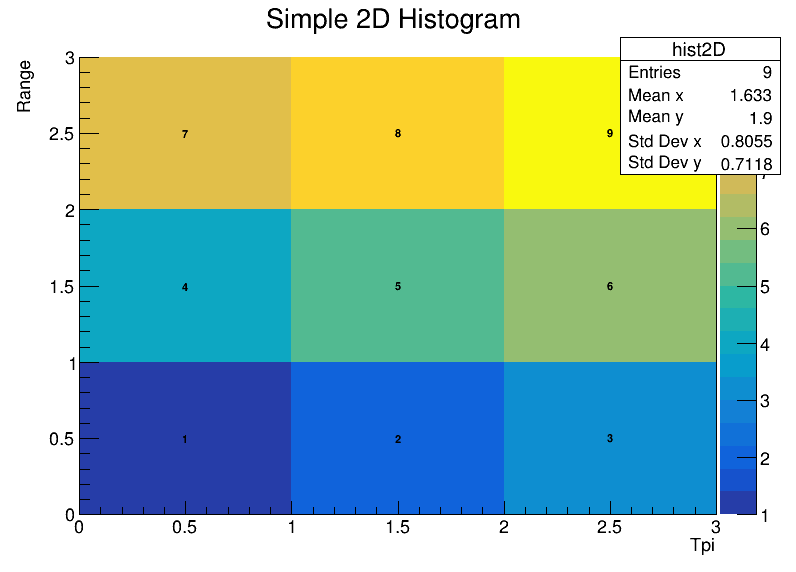

In [65]:
# Draw the 2D histogram
canvas = TCanvas("canvas", "2D Histogram", 800, 600)
hist2D.Draw("COLZ TEXT")
canvas.Draw()  # In Jupyter, .Draw() shows the canvas

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_proj1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_proj2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_proj3


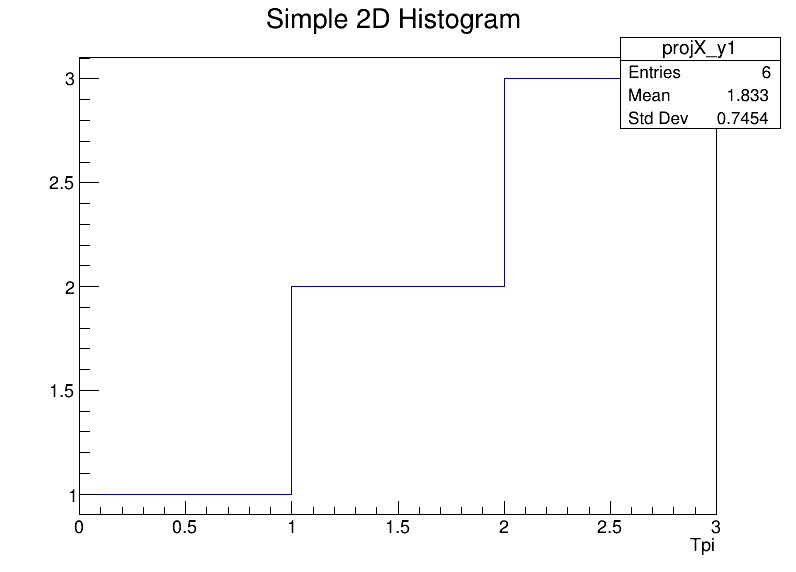

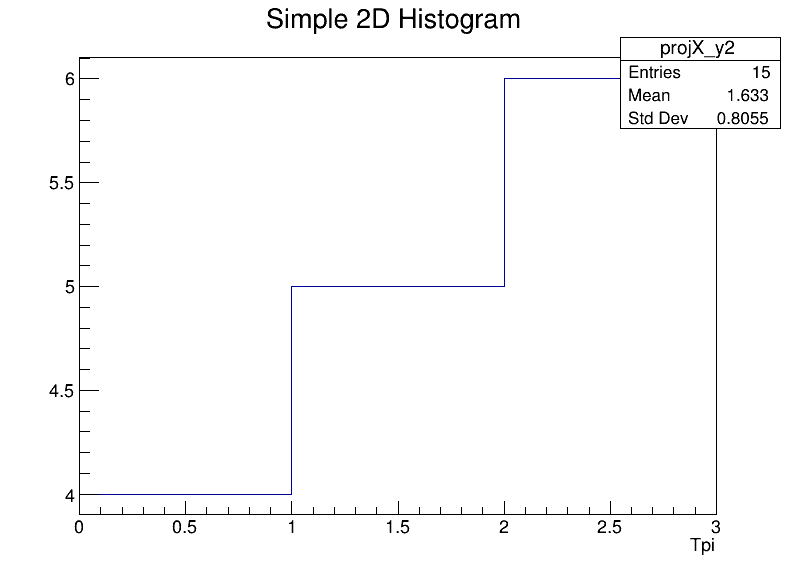

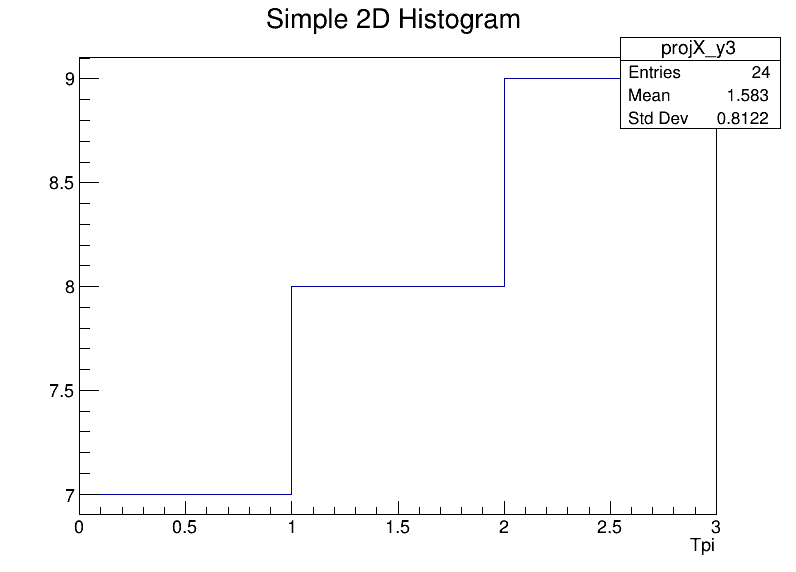

In [83]:
# List to hold the projected histograms and canvases
projected_histograms = []
canvases = []

# Perform the ProjectionX for each y-bin and plot
for ybin in range(1, 4):  # Loop over y bins (from bin 1 to bin 3)
    # Create projection of the current Y bin on the X-axis
    projection = hist2D.ProjectionX(f"projX_y{ybin}", ybin, ybin, "e")
    #projection = hist2D.ProjectionX(f"projX_y{ybin}", ybin)
    
    # Add the projected histogram to the list for plotting later
    projected_histograms.append(projection)
    
    # Create a new canvas for each projection
    canvas_proj = TCanvas(f"canvas_proj{ybin}", f"ProjectionX for y-bin {ybin}", 800, 600)
    canvases.append(canvas_proj)
    
    # Draw the projection on its canvas
    canvas_proj.cd()  # Set this canvas as the active one
    projection.Draw("HIST")
    
    # Show the canvas in the notebook
    canvas_proj.Draw()
    canvas_proj.Update()  # Ensure the canvas is updated to display the plot

In [84]:
# Calculate and print the median for each projected histogram
for ybin, projection in enumerate(projected_histograms, 1):
    median_definition = ar.array("d", [0.5])  # Median definition
    median_result = ar.array("d", [0.0])  # Where to store the result
    projection.GetQuantiles(1, median_result, median_definition)
    
    print(f"Y bin {ybin}, Median of Tpi: {median_result[0]}")

Y bin 1, Median of Tpi: 2.0
Y bin 2, Median of Tpi: 1.7000000000000002
Y bin 3, Median of Tpi: 1.625


In [85]:
print(projected_histograms[1].GetBinContent(2))
projected_histograms[1].GetBinError(2)

5.0


2.23606797749979

In [86]:
7.5/13

0.5769230769230769

Median of Tpi: 0.5769230769230769


Warning in <TROOT::Append>: Replacing existing TH1: hist1D (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


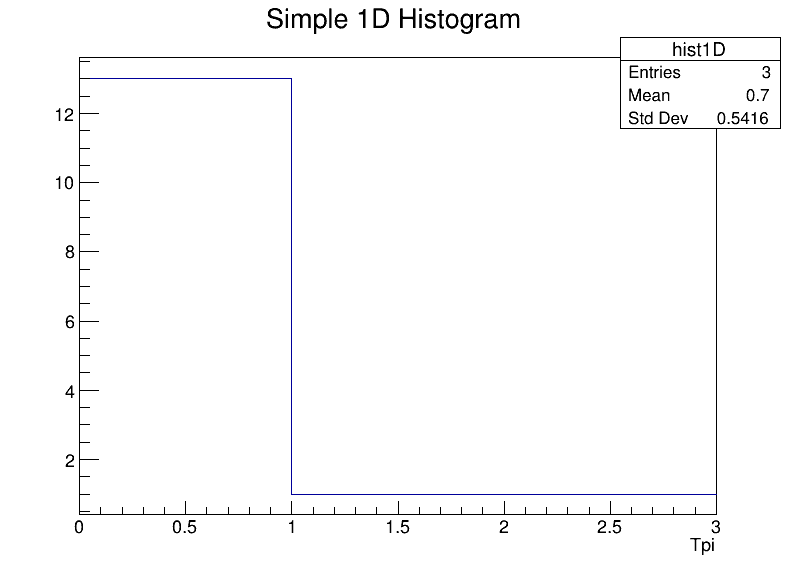

In [97]:
# Create a 2D histogram (3x3 bins)
hist1D = TH1F("hist1D", "Simple 1D Histogram;Tpi", 3, 0, 3)

hist1D.SetBinContent(1, 13)
hist1D.SetBinContent(2, 1)
hist1D.SetBinContent(3, 1)

c = TCanvas(f"c1", f"c1", 800, 600)

hist1D.Draw("HIST")

c.Draw()
median_definition = ar.array("d", [0.5])  # Median definition
median_result = ar.array("d", [0.0])  # Where to store the result
hist1D.GetQuantiles(1, median_result, median_definition)
    
print(f"Median of Tpi: {median_result[0]}")